Mit diesem neuronalen Netz, soll ermittelt werden ob ein Mitarbeiter, anhand von einigen Faktoren, das Unternehmen verlassen wird. Dazu wurde ein Datensatz mit 15000 HR Daten ausgewertet. Folgende Faktoren sind ermittelt worden:
Zufriedenheit (%)
letzte Evaluation (%)
Anzahl der Projekte (Zahl)
durchschnittliche monatliche Arbeitsstunden (Stunden)
Betriebszugehörigkeit (Jahre)
Arbeitsunfall (ja/nein)
Beförderung in den letzten 5 Jahren (ja/nein)
Abteilung (String)	
Gehalt (low/medium/high)

Import der benötigten Frameworks

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#einlesen der Daten in ein Pandas Datenframe
df = pd.read_csv("datasets/HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#Zuweisung von numerischen Werten für die Abteilungen, für ein einfacheres Datenhandling
mymap = {'accounting':1,'hr':2,'IT':3, 'management': 4 ,'marketing':3, 'product_mng' :5 , 
         'RandD':6,'sales':7,'support':8,'technical':9,}

dfh =df.applymap(lambda s: mymap.get(s) if s in mymap else s)

dfh.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [4]:
#Zuweisung von numerischen Werten für das Gehalt, für ein einfacheres Datenhandling#
mymap = {'low':1,'medium':2,'high':3}

dfh1 =dfh.applymap(lambda s: mymap.get(s) if s in mymap else s)

dfh1.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [5]:
#Umsortierung der Spalten um die Daten für Tensorflow aufzubereiten
cols = dfh1.columns.tolist()
cols.insert(9, cols.pop(cols.index('left')))
dfh1 = dfh1.reindex(columns= cols)
dfh1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1


Target value min 0.000 max 1.000 mean 0.238 std 0.426


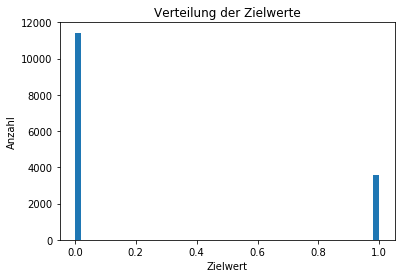

In [6]:
#Übersicht über die Verteilung der Zielwerte
y = dfh1['left'].values
plt.hist(y, bins=50)
plt.xlabel('Zielwert')
plt.ylabel('Anzahl')
plt.title('Verteilung der Zielwerte')
print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

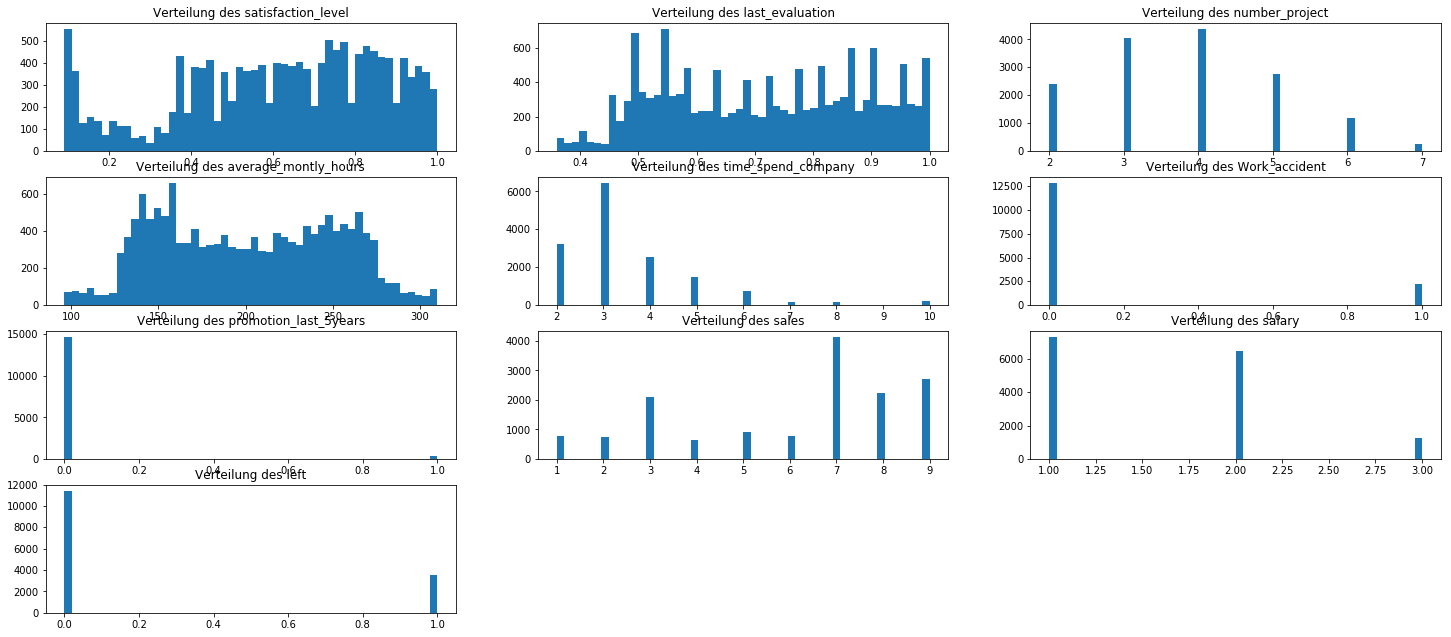

In [7]:
#Übersicht über die Verteilung der einzelnen Atrribute des Datensatzes
F_cols = [col for col in dfh1.columns]
fig = plt.figure(figsize=(25, 25))
plt_count = 0
for col in F_cols:
    plt_count += 1
    plt.subplot(9, 3, plt_count) 
    plt.hist(dfh1[col].values, 50)
    plt.title("Verteilung: "+col)
plt.show()

In [8]:
#Aufteilung in ein Trainings- und ein Testset mit der split Funktion von sklearn
train_set, test_set = train_test_split(dfh1, test_size=0.1, random_state=42)

In [9]:
train_set.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
11809,0.93,0.51,4,110,3,0,0,5,1,0
970,0.38,0.46,2,147,3,0,0,8,1,1
1598,0.83,0.94,5,273,5,0,0,6,2,1
11804,0.64,0.88,3,252,2,0,0,7,1,0
2582,0.58,0.86,5,271,3,0,0,3,1,0


In [10]:
#Abspeichern der Pandas Dataframes in CSV Dateien
train_set.to_csv("train.csv", header=None, index=None)

In [11]:
test_set.to_csv("test.csv", header=None, index=None)

In [12]:
# Laden der CSV Dateien in Tensorflow (hier wurden vorbereitete CSV Dateien genutzt)
training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename='train_prepared.csv',
    target_dtype=np.int,
    features_dtype=np.float32)

testing_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename='test_prepared.csv',
    target_dtype=np.int,
    features_dtype=np.float32)

In [13]:
# Trainingsinputs definieren
def get_train_inputs():
    x = tf.constant(training_set.data)
    y = tf.constant(training_set.target)
    #  y = tf.summary.scalar(, training_set.target)
    return x, y

In [14]:
# Testinputs definieren
def get_test_inputs():
    x = tf.constant(testing_set.data)
    y = tf.constant(testing_set.target)
    return x, y

In [15]:
# Auslesen der Trainingsdaten
training_set.data

array([[ 0.93000001,  0.50999999,  4.        , ...,  0.        ,
         5.        ,  1.        ],
       [ 0.38      ,  0.46000001,  2.        , ...,  0.        ,
         8.        ,  1.        ],
       [ 0.82999998,  0.94      ,  5.        , ...,  0.        ,
         6.        ,  2.        ],
       ..., 
       [ 0.66000003,  0.73000002,  5.        , ...,  0.        ,
         8.        ,  2.        ],
       [ 0.79000002,  1.        ,  4.        , ...,  0.        ,
         7.        ,  1.        ],
       [ 0.98000002,  0.86000001,  2.        , ...,  0.        ,
         7.        ,  1.        ]], dtype=float32)

In [16]:
training_set.target

array([0, 1, 1, ..., 0, 1, 0])

In [17]:
# Aufbau eines Color Dictionarys um den Scatter Plot visualisieren zu können
colorDict = ["blue", "red"]
colorDict

['blue', 'red']

In [18]:
# Zuweisung der Farben zu den Target Werten
# Blau = Mitarbeiter bleibt
# Rot =Mitarbeiter verlässt das Unternehmen
colors = []
for target in training_set.target:
    colors.append(colorDict[target])

In [19]:
#Daten für die Visualisierung definieren
dataX0 = training_set.data[:,0]
dataX1 = training_set.data[:,1]
dataX2 = training_set.data[:,2]
dataX3 = training_set.data[:,3]
dataX4 = training_set.data[:,4]
dataX5 = training_set.data[:,5]
dataX6 = training_set.data[:,6]
dataX7 = training_set.data[:,7]
dataX8 = training_set.data[:,8]

dataY = training_set.target[:]

# Scatterplots
beispielhaft wurden hier 2 Scatterplots gezeichnet um Abhängigkeiten zwischen den Attributen erkennen zu können.
Im ersten Scatterplot wurden die monatlichen Stunden mit der Zufriedenheit verglichen, hierbei fällt auf, dass sich vor allem zwei Cluster bilden bei Leuten, welche das Unternehmen verlassen.
1. Mitarbeiter, welche sehr wenig arbeiten und dabei unzufrieden sind
2. Mitarbeiter mit einer sehr hohen Zufriedenheit und Arbeitsleistung, diese werden womöglich abgeworben

Der zweite Scatterplot zeigt die Zufriedenheit in Abhängigkeit mit der letzten Mitarbeiterevaluation, hier finden sich drei Cluster
1. Hohe Zufriedenheit, gute Evaluation (Mitarbeiter werden womöglich abgeworben
2. Niedrige Zufriedenheit, gute Evaluation (Mitarbeiter sind unzufrieden und verlassen das Unternehmen)
3. Niedrige Zufriedenheit, schlechte Evaluation (Momöglich unmotivierte Minderleister, welche man garnicht halten möchte)

In dieser Form sind noch viele Scatterplots möglich zu visualisieren. 

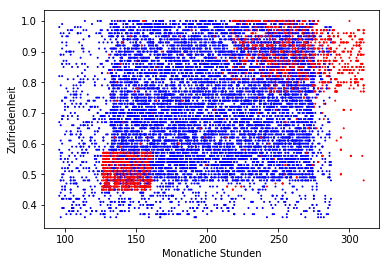

In [20]:
plt.scatter(dataX3, dataX1, c=colors, s=1) # , cmap=plt.cm.cool)
plt.xlabel('Monatliche Stunden')
plt.ylabel('Zufriedenheit')
plt.show()

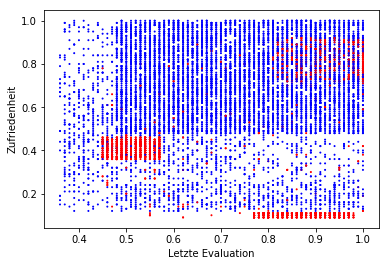

In [21]:
plt.scatter(dataX1, dataX0, c=colors, s=1) # , cmap=plt.cm.cool)
plt.xlabel('Letzte Evaluation')
plt.ylabel('Zufriedenheit')
plt.show()

In [22]:
# Alle Spalten besitzen echte Daten, und die Dimension beträgt 9
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=9)]

In [23]:
# Instanziierung des Classifieres, hier wurden 4 Ebenen gewählt mit jeweils 10, 50, 100, 10 Neuronen, dies ergab in Tests das beste Ergebnis
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 50, 100, 10],
                                            n_classes=2,
                                            model_dir="/tmp/HR_model188")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11776be48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/HR_model13'}


In [ ]:
# Das Trainieren des Classifiers mit Hilfe der Traingsdaten, es wurden 100.000 Schritte gewählt, 
# damit konnte eine Accuracy von 97, % erreicht werden
classifier.fit(input_fn=get_train_inputs, steps=100000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/HR_model13/model.ckpt-10000
INFO:tensorflow:Saving checkpoints for 10001 into /tmp/HR_model13/model.ckpt.
INFO:tensorflow:loss = 0.150879, step = 10001
INFO:tensorflow:global_step/sec: 37.3112
INFO:tensorflow:loss = 0.154312, step = 10101 (2.682 sec)
INFO:tensorflow:global_step/sec: 37.2992
INFO:tensorflow:loss = 0.153671, step = 10201 (2.681 sec)
INFO:tensorflow:global_step/sec: 34.2186
INFO:tensorflow:loss = 0.162497, step = 10301 (2.923 sec)
INFO:tensorflow:global_step/sec: 37.4831
INFO:tensorflow:loss = 0.150418, step = 10401 (2.667 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 0.129554, step = 17401 (2.760 sec)
INFO:tensorflow:global_step/sec: 36.5771
INFO:tensorflow:loss = 0.131088, step = 17501 (2.733 sec)
INFO:tensorflow:global_step/sec: 36.6428
INFO:tensorflow:loss = 0.130819, step = 17601 (2.729 sec)
INFO:tensorflow:global_step/sec: 36.5781
INFO:tensorflow:loss = 0.131142, step = 17701 (2.734 sec)
INFO:tensorflow:global_step/sec: 36.7247
INFO:tensorflow:loss = 0.131056, step = 17801 (2.723 sec)
INFO:tensorflow:global_step/sec: 36.6702
INFO:tensorflow:loss = 0.130824, step = 17901 (2.727 sec)
INFO:tensorflow:global_step/sec: 36.4478
INFO:tensorflow:loss = 0.130189, step = 18001 (2.743 sec)
INFO:tensorflow:global_step/sec: 36.1532
INFO:tensorflow:loss = 0.127622, step = 18101 (2.767 sec)
INFO:tensorflow:global_step/sec: 36.4793
INFO:tensorflow:loss = 0.129224, step = 18201 (2.739 sec)
INFO:tensorflow:global_step/sec: 36.6093
INFO:tensorflow:loss = 0.130333, step = 18301 (2.733 sec)
INFO:tensorflow:global_step/sec: 36.3036
INFO:tenso

INFO:tensorflow:loss = 0.121098, step = 25701 (2.729 sec)
INFO:tensorflow:global_step/sec: 36.624
INFO:tensorflow:loss = 0.118571, step = 25801 (2.731 sec)
INFO:tensorflow:global_step/sec: 36.8001
INFO:tensorflow:loss = 0.118334, step = 25901 (2.717 sec)
INFO:tensorflow:global_step/sec: 36.2916
INFO:tensorflow:loss = 0.118142, step = 26001 (2.756 sec)
INFO:tensorflow:global_step/sec: 36.1679
INFO:tensorflow:loss = 0.117995, step = 26101 (2.765 sec)
INFO:tensorflow:global_step/sec: 36.381
INFO:tensorflow:loss = 0.122885, step = 26201 (2.749 sec)
INFO:tensorflow:global_step/sec: 36.5726
INFO:tensorflow:loss = 0.119735, step = 26301 (2.734 sec)
INFO:tensorflow:global_step/sec: 36.594
INFO:tensorflow:loss = 0.119273, step = 26401 (2.732 sec)
INFO:tensorflow:global_step/sec: 36.6521
INFO:tensorflow:loss = 0.118332, step = 26501 (2.728 sec)
INFO:tensorflow:global_step/sec: 34.0215
INFO:tensorflow:loss = 0.121309, step = 26601 (2.940 sec)
INFO:tensorflow:global_step/sec: 25.8394
INFO:tensorfl

INFO:tensorflow:global_step/sec: 33.8877
INFO:tensorflow:loss = 0.110974, step = 34001 (2.950 sec)
INFO:tensorflow:global_step/sec: 35.49
INFO:tensorflow:loss = 0.113658, step = 34101 (2.820 sec)
INFO:tensorflow:global_step/sec: 32.7919
INFO:tensorflow:loss = 0.112916, step = 34201 (3.049 sec)
INFO:tensorflow:global_step/sec: 33.4995
INFO:tensorflow:loss = 0.111987, step = 34301 (2.985 sec)
INFO:tensorflow:global_step/sec: 33.052
INFO:tensorflow:loss = 0.110137, step = 34401 (3.025 sec)
INFO:tensorflow:global_step/sec: 33.9561
INFO:tensorflow:loss = 0.112565, step = 34501 (2.944 sec)
INFO:tensorflow:global_step/sec: 29.1929
INFO:tensorflow:loss = 0.109579, step = 34601 (3.426 sec)
INFO:tensorflow:global_step/sec: 30.5749
INFO:tensorflow:loss = 0.111367, step = 34701 (3.271 sec)
INFO:tensorflow:global_step/sec: 33.0368
INFO:tensorflow:loss = 0.110864, step = 34801 (3.027 sec)
INFO:tensorflow:global_step/sec: 36.562
INFO:tensorflow:loss = 0.110407, step = 34901 (2.735 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 27.4933
INFO:tensorflow:loss = 0.105597, step = 42301 (3.636 sec)
INFO:tensorflow:global_step/sec: 35.9783
INFO:tensorflow:loss = 0.104171, step = 42401 (2.781 sec)
INFO:tensorflow:global_step/sec: 35.9973
INFO:tensorflow:loss = 0.105647, step = 42501 (2.778 sec)
INFO:tensorflow:global_step/sec: 26.1327
INFO:tensorflow:loss = 0.104068, step = 42601 (3.827 sec)
INFO:tensorflow:global_step/sec: 29.0661
INFO:tensorflow:loss = 0.104013, step = 42701 (3.440 sec)
INFO:tensorflow:global_step/sec: 30.3727
INFO:tensorflow:loss = 0.105612, step = 42801 (3.292 sec)
INFO:tensorflow:global_step/sec: 32.9246
INFO:tensorflow:loss = 0.10255, step = 42901 (3.039 sec)
INFO:tensorflow:global_step/sec: 31.6497
INFO:tensorflow:loss = 0.106082, step = 43001 (3.159 sec)
INFO:tensorflow:global_step/sec: 32.2699
INFO:tensorflow:loss = 0.103525, step = 43101 (3.098 sec)
INFO:tensorflow:global_step/sec: 32.9669
INFO:tensorflow:loss = 0.10563, step = 43201 (3.033 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 36.9496
INFO:tensorflow:loss = 0.0983327, step = 50601 (2.707 sec)
INFO:tensorflow:global_step/sec: 36.8041
INFO:tensorflow:loss = 0.0983922, step = 50701 (2.717 sec)
INFO:tensorflow:global_step/sec: 37.3205
INFO:tensorflow:loss = 0.0991067, step = 50801 (2.680 sec)
INFO:tensorflow:global_step/sec: 36.923
INFO:tensorflow:loss = 0.0986821, step = 50901 (2.708 sec)
INFO:tensorflow:global_step/sec: 36.9229
INFO:tensorflow:loss = 0.0980662, step = 51001 (2.708 sec)
INFO:tensorflow:global_step/sec: 36.9208
INFO:tensorflow:loss = 0.0995472, step = 51101 (2.709 sec)
INFO:tensorflow:Saving checkpoints for 51174 into /tmp/HR_model13/model.ckpt.
INFO:tensorflow:global_step/sec: 27.5044
INFO:tensorflow:loss = 0.0984683, step = 51201 (3.636 sec)
INFO:tensorflow:global_step/sec: 31.6838
INFO:tensorflow:loss = 0.098743, step = 51301 (3.156 sec)
INFO:tensorflow:global_step/sec: 31.2154
INFO:tensorflow:loss = 0.0979137, step = 51401 (3.203 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 0.0953254, step = 58701 (2.715 sec)
INFO:tensorflow:global_step/sec: 36.6396
INFO:tensorflow:loss = 0.0939467, step = 58801 (2.729 sec)
INFO:tensorflow:global_step/sec: 36.9945
INFO:tensorflow:loss = 0.0933678, step = 58901 (2.703 sec)
INFO:tensorflow:global_step/sec: 36.6285
INFO:tensorflow:loss = 0.0951832, step = 59001 (2.730 sec)
INFO:tensorflow:global_step/sec: 36.6466
INFO:tensorflow:loss = 0.0945713, step = 59101 (2.729 sec)
INFO:tensorflow:global_step/sec: 36.7901
INFO:tensorflow:loss = 0.0941917, step = 59201 (2.718 sec)
INFO:tensorflow:global_step/sec: 36.9276
INFO:tensorflow:loss = 0.0947442, step = 59301 (2.708 sec)
INFO:tensorflow:global_step/sec: 36.6894
INFO:tensorflow:loss = 0.0937699, step = 59401 (2.727 sec)
INFO:tensorflow:global_step/sec: 36.6368
INFO:tensorflow:loss = 0.0935417, step = 59501 (2.728 sec)
INFO:tensorflow:global_step/sec: 35.9548
INFO:tensorflow:loss = 0.0954709, step = 59601 (2.785 sec)
INFO:tensorflow:global_step/sec: 36.5238


INFO:tensorflow:global_step/sec: 37.7354
INFO:tensorflow:loss = 0.0894044, step = 67001 (2.650 sec)
INFO:tensorflow:global_step/sec: 37.2494
INFO:tensorflow:loss = 0.0894589, step = 67101 (2.684 sec)
INFO:tensorflow:global_step/sec: 37.3553
INFO:tensorflow:loss = 0.0892391, step = 67201 (2.677 sec)
INFO:tensorflow:global_step/sec: 37.5998
INFO:tensorflow:loss = 0.0893952, step = 67301 (2.659 sec)
INFO:tensorflow:global_step/sec: 37.6851
INFO:tensorflow:loss = 0.089016, step = 67401 (2.654 sec)
INFO:tensorflow:global_step/sec: 37.5339
INFO:tensorflow:loss = 0.0913376, step = 67501 (2.665 sec)
INFO:tensorflow:global_step/sec: 37.6173
INFO:tensorflow:loss = 0.0906396, step = 67601 (2.658 sec)
INFO:tensorflow:global_step/sec: 37.4336
INFO:tensorflow:loss = 0.0897244, step = 67701 (2.671 sec)
INFO:tensorflow:global_step/sec: 37.4987
INFO:tensorflow:loss = 0.0897346, step = 67801 (2.667 sec)
INFO:tensorflow:global_step/sec: 37.0958
INFO:tensorflow:loss = 0.090229, step = 67901 (2.696 sec)
IN

INFO:tensorflow:loss = 0.0852761, step = 75101 (2.803 sec)
INFO:tensorflow:global_step/sec: 36.6559
INFO:tensorflow:loss = 0.0846841, step = 75201 (2.728 sec)
INFO:tensorflow:global_step/sec: 36.3689
INFO:tensorflow:loss = 0.0853695, step = 75301 (2.749 sec)
INFO:tensorflow:global_step/sec: 36.0352
INFO:tensorflow:loss = 0.0870484, step = 75401 (2.774 sec)
INFO:tensorflow:global_step/sec: 35.8772
INFO:tensorflow:loss = 0.0860525, step = 75501 (2.788 sec)
INFO:tensorflow:global_step/sec: 34.8375
INFO:tensorflow:loss = 0.0873169, step = 75601 (2.871 sec)
INFO:tensorflow:global_step/sec: 33.5933
INFO:tensorflow:loss = 0.0864945, step = 75701 (2.977 sec)
INFO:tensorflow:global_step/sec: 35.4431
INFO:tensorflow:loss = 0.0849609, step = 75801 (2.822 sec)
INFO:tensorflow:global_step/sec: 36.7642
INFO:tensorflow:loss = 0.0847529, step = 75901 (2.719 sec)
INFO:tensorflow:global_step/sec: 36.2348
INFO:tensorflow:loss = 0.0847448, step = 76001 (2.760 sec)
INFO:tensorflow:global_step/sec: 35.7981


In [ ]:
#Ausgabe der Genuigkeit unseres erstellten Classifieres mit Hilfe der Test Daten
accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
print("\nTest Accuracy: {0:.1f}%\n".format(100*accuracy_score))

In [ ]:
# Klassifizierung von zwei neuen, selbst ausgedachten Mitarbeitern
def new_samples():
  return np.array(
    [[0.41, 0.47, 2, 154, 3, 0, 0, 7, 1],
     [0.59, 0.65, 6, 250, 5, 0, 0, 7, 2]], dtype=np.float32)

In [ ]:
predictions = list(classifier.predict_classes(input_fn=new_samples))
predictions

In [ ]:
#Einordnung der Mitarbeiter in dem vorher schon gezeigten Scatter Plot
plt.scatter(dataX3, dataX1, c=colors, s=1)
plt.scatter(new_samples()[1,3], new_samples()[1,0], c=["black"], marker="x", s=100)
plt.scatter(new_samples()[0,3], new_samples()[0,0], c=["black"], marker="x", s=100)
plt.show()